In [145]:
#import rejex
import re
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [146]:
import re

def find_last_number(line):
    numbers = re.findall(r'-?\d+\.\d+|-?\d+', line)
    #check negative sign and keep it with the number
    if numbers:
        return numbers[-1]
    else:
        return None

In [147]:
find_last_number("-22 + -33.5 = -55.5")

'-55.5'

In [148]:
def modify_file(file_name,digits_after_decimal=4):
    with open(file_name) as f:
        content = f.readlines()
    
    #for every line in the file convert to format '1.0 / 2.0 =  answer=0.5000 \n'
    problem=[]
    answer=[]
    for i in range(len(content)):
        
        #find no of equal to sign
        equal_sign = content[i].count('=')
        
        #split
        line=content[i].split('=')
        
        problem.append(line[0])
        
        line[-1]=find_last_number(line[-1])
        
            
        if line[-1] is None:
            #string of 0.0000 with 4 zeros after decimal
            line[-1]='0.'+'0'*digits_after_decimal

        try:
                float(line[-1].strip().replace(' ','').replace('(','').replace(')',''))
                ans=line[-1].strip().replace(' ','').replace('(','').replace(')','')
                answer.append(ans)

            
        except:
            print("Error in line ",i)
            print(line)
            print(line[-1].strip().replace(' ','').replace('(','').replace(')',''))
            print("Error in line ",i)
            
    
    print("Length of problem",len(problem))
    print("Length of answer",len(answer))
                 
    return problem,answer

In [149]:
problem,predicted_answer_4_digit=modify_file('division_4_digit.txt',4)

_,predicted_answer_8_digit=modify_file('division_8_digit.txt',8)

_,predicted_answer_12_digit=modify_file('division_12_digit.txt',12)



Length of problem 3432
Length of answer 3432
Length of problem 3432
Length of answer 3432
Length of problem 3432
Length of answer 3432


In [150]:
print(problem[:1000])
print(predicted_answer_4_digit[179])
print(predicted_answer_8_digit[:10])
print(predicted_answer_12_digit[:10])

['1.0 / 2.0 ', '2.0 / 1.0 ', '1.0 / 3.0 ', '3.0 / 1.0 ', '1.0 / 4.0 ', '4.0 / 1.0 ', '1.0 / 5.0 ', '5.0 / 1.0 ', '1.0 / 6.0 ', '6.0 / 1.0 ', '1.0 / 7.0 ', '7.0 / 1.0 ', '1.0 / 8.0 ', '8.0 / 1.0 ', '1.0 / 9.0 ', '9.0 / 1.0 ', '2.0 / 1.0 ', '1.0 / 2.0 ', '2.0 / 3.0 ', '3.0 / 2.0 ', '2.0 / 4.0 ', '4.0 / 2.0 ', '2.0 / 5.0 ', '5.0 / 2.0 ', '2.0 / 6.0 ', '6.0 / 2.0 ', '2.0 / 7.0 ', '7.0 / 2.0 ', '2.0 / 8.0 ', '8.0 / 2.0 ', '2.0 / 9.0 ', '9.0 / 2.0 ', '3.0 / 1.0 ', '1.0 / 3.0 ', '3.0 / 2.0 ', '2.0 / 3.0 ', '3.0 / 4.0 ', '4.0 / 3.0 ', '3.0 / 5.0 ', '5.0 / 3.0 ', '3.0 / 6.0 ', '6.0 / 3.0 ', '3.0 / 7.0 ', '7.0 / 3.0 ', '3.0 / 8.0 ', '8.0 / 3.0 ', '3.0 / 9.0 ', '9.0 / 3.0 ', '4.0 / 1.0 ', '1.0 / 4.0 ', '4.0 / 2.0 ', '2.0 / 4.0 ', '4.0 / 3.0 ', '3.0 / 4.0 ', '4.0 / 5.0 ', '5.0 / 4.0 ', '4.0 / 6.0 ', '6.0 / 4.0 ', '4.0 / 7.0 ', '7.0 / 4.0 ', '4.0 / 8.0 ', '8.0 / 4.0 ', '4.0 / 9.0 ', '9.0 / 4.0 ', '5.0 / 1.0 ', '1.0 / 5.0 ', '5.0 / 2.0 ', '2.0 / 5.0 ', '5.0 / 3.0 ', '3.0 / 5.0 ', '5.0 / 4.0 ', '4.0 

In [151]:
def is_correct(a,b,div,accuracy_digit):
    return round(a/b,accuracy_digit) == round(div,accuracy_digit)

def get_num_digits(num):
    return len(str(num).split('.')[0].replace('-',''))

In [152]:
MAX_DIGITS=6

total_acc4 = np.zeros((3,2,MAX_DIGITS))
correct_acc4 = np.zeros((3,2,MAX_DIGITS))


classified_responses_acc4 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number

##########################reference from gemini code (rushikesh)###################################

for i in range(len(problem)):
    a,b=problem[i].split('/')

    a=float(a)
    b=float(b)

    div=float(predicted_answer_4_digit[i])

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc4[sign,order,num_digits-1] += 1
    correct_acc4[sign,order,num_digits-1] += is_correct(a,b,div,4)


        # classify the response
    classified_responses_acc4[sign][order][num_digits-1].append(problem[i])

total_acc4 = np.where(total_acc4 == 0, 1, total_acc4)

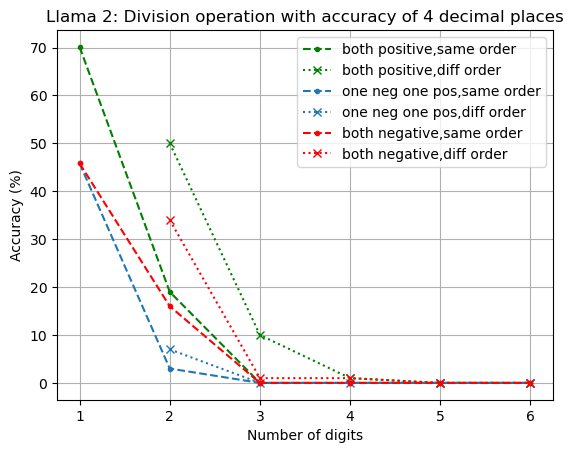

In [153]:
accuracy_acc4 = correct_acc4*100/total_acc4
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc4[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc4[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc4[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc4[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc4[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc4[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Division operation with accuracy of 4 decimal places')
plt.legend()
plt.grid()
plt.show()

In [154]:
MAX_DIGITS = 6

total_acc8 = np.zeros((3,2,MAX_DIGITS))
correct_acc8 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc8 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number



##########################reference from gemini code (rushikesh)###################################

for i in range(len(problem)):

    a,b=problem[i].split('/')

    a=float(a)
    b=float(b)

    div=float(predicted_answer_8_digit[i])

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc8[sign,order,num_digits-1] += 1
    correct_acc8[sign,order,num_digits-1] += is_correct(a,b,div,8)

    # classify the response
    classified_responses_acc8[sign][order][num_digits-1].append(problem[i])

total_acc8 = np.where(total_acc8 == 0, 1, total_acc8)

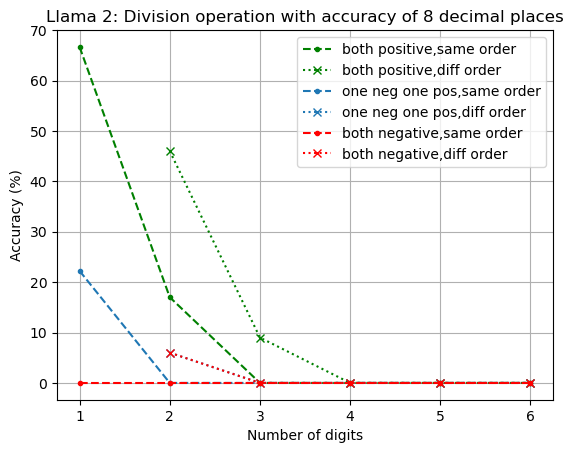

In [155]:
accuracy_acc8 = correct_acc8*100/total_acc8
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc8[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc8[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc8[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc8[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc8[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc8[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Division operation with accuracy of 8 decimal places')
plt.legend()
plt.grid()
plt.show()

In [156]:
MAX_DIGITS = 6

total_acc12 = np.zeros((3,2,MAX_DIGITS))
correct_acc12 = np.zeros((3,2,MAX_DIGITS))

classified_responses_acc12 = {
                        0:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        1:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}},
                        2:{0:{0:[],1:[],2:[],3:[],4:[],5:[]},1:{0:[],1:[],2:[],3:[],4:[],5:[]}}
                       }
# axis 0: sign of both numbers, 0: both positive, 1: one negative, 2: both negative
# axis 1: order of the numbers, 0: both same order, 1: different order
# axis 2: number of digits in highest order number



##########################reference from gemini code (rushikesh)###################################

for i in range(len(problem)):

    a,b=problem[i].split('/')

    a=float(a)
    b=float(b)

    div=float(predicted_answer_12_digit[i])

    # get sign of a and b
    sign_a = 0 if a >= 0 else 1
    sign_b = 0 if b >= 0 else 1

    # sign shows if both numbers are positive or negative or one of them is negative
    sign = sign_a + sign_b

    # get the number of digits in the highest order number
    digit_a = get_num_digits(a)
    digit_b = get_num_digits(b)

    # order shows if the numbers are in the same order or different order
    order = 0 if digit_a == digit_b else 1

    # get number of digits in the highest order number
    num_digits = max(digit_a,digit_b)

    # increment the total count
    total_acc12[sign,order,num_digits-1] += 1
    correct_acc12[sign,order,num_digits-1] += is_correct(a,b,div,12)

    # classify the response
    classified_responses_acc12[sign][order][num_digits-1].append(problem[i])

total_acc12 = np.where(total_acc12 == 0, 1, total_acc12)

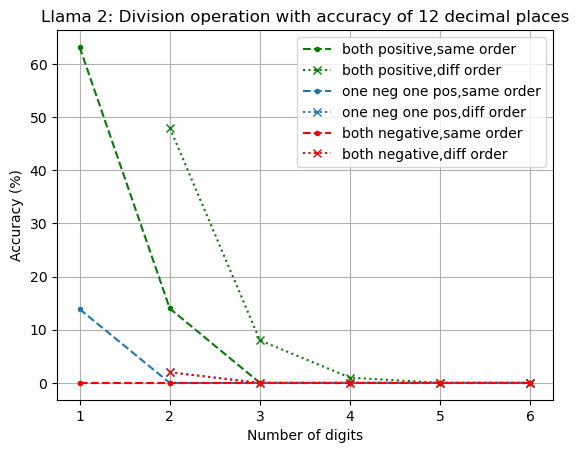

In [157]:
accuracy_acc12 = correct_acc12*100/total_acc12
digits = np.arange(1,MAX_DIGITS+1)

# plot the accuracy for different number of digits
plt.plot(digits, accuracy_acc12[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive,same order')
plt.plot(digits[1:], accuracy_acc12[0,1,1:],marker='x',linestyle=':',color='green',label='both positive,diff order')
plt.plot(digits, accuracy_acc12[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='one neg one pos,same order')
plt.plot(digits[1:], accuracy_acc12[1,1,1:],marker='x',linestyle=':',color='#1f77b4',label='one neg one pos,diff order')
plt.plot(digits, accuracy_acc12[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative,same order')
plt.plot(digits[1:], accuracy_acc12[2,1,1:],marker='x',linestyle=':',color='red',label='both negative,diff order')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Division operation with accuracy of 12 decimal places')
plt.legend()
plt.grid()
plt.show()

In [159]:
#############################################reference from gemini code (rushikesh)###################################

def avg_of_non_zero_elem_for_each_digit(arr):
    '''
    calculate the average of non zero elements for each digit (axis 2) across axis 0 and 1
    '''
    # get count of non zero elements across axis 0 and 1
    non_zero_count = np.count_nonzero(arr, axis=(0, 1))

    # get sum of non zero elements across axis 0 and 1
    non_zero_sum = np.sum(arr * (arr != 0), axis=(0, 1))

    # calculate average
    avg = non_zero_sum/(non_zero_count +1e-6)

    return avg

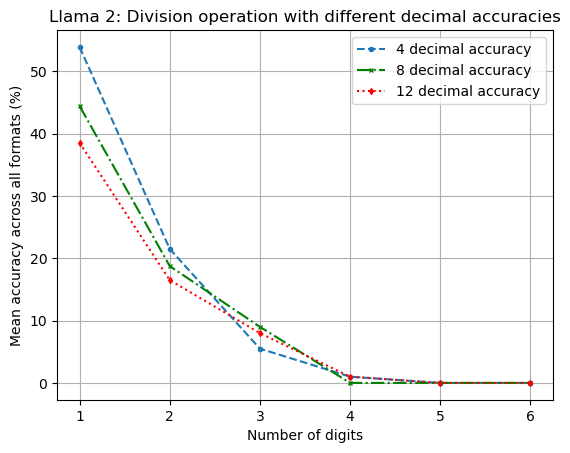

In [161]:
# plot the accuracy for different number of digits
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc4),marker='o',ms=3,linestyle='--',color='#1f77b4',label='4 decimal accuracy')
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc8),marker='x',ms=3,linestyle='-.',color='green',label='8 decimal accuracy')
plt.plot(digits, avg_of_non_zero_elem_for_each_digit(accuracy_acc12),marker='d',ms=3,linestyle=':',color='red',label='12 decimal accuracy')
plt.xlabel('Number of digits')
plt.ylabel('Mean accuracy across all formats (%)')
plt.title('Llama 2: Division operation with different decimal accuracies')
plt.legend()
plt.grid()
plt.show()